In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
class Perceptron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Perceptron, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.activation = nn.Sigmoid()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x

In [3]:
# Define the dimensions of input, hidden layer, and output
input_size = 2
hidden_size = 3
output_size = 1

In [4]:
# Instantiate the model
model = Perceptron(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)

In [5]:
# Example input and target data (XOR gate)
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
targets = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [6]:
# Training loop
loss_values = []
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Append the loss value to the list
    loss_values.append(loss.item())

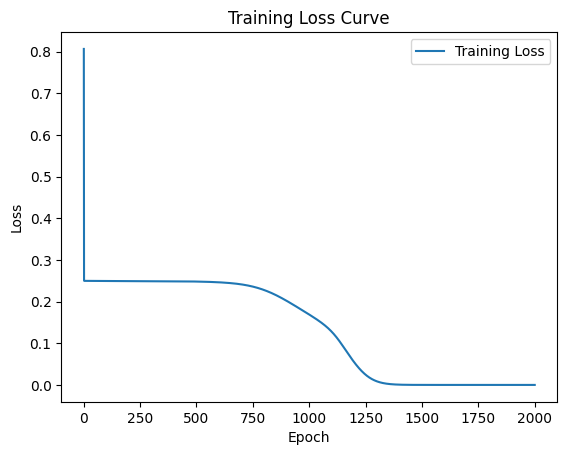

In [7]:
# Plot the loss curve
plt.plot(range(1, num_epochs+1), loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [8]:
# Test the model
with torch.no_grad():
    test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predicted = model(test_input)
    predicted_binary = torch.round(predicted).squeeze().tolist()
    print("Predicted values after training:")
    print(predicted_binary)

Predicted values after training:
[0.0, 1.0, 1.0, 0.0]


# For comparison: XOR operation training using gradient descent method that we learned in Chapter 13. Perceptron




In [ ]:
import numpy as np, matplotlib.pyplot as plt

N = 4 # Number of training data
Nep = 4000 # Number of epochs
alpha = 0.5 # training rate

def phi(x):
  return 1.0/(1.0+np.exp(-x))

# Training data: Inputs are binary pairs
x_train = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])  # Input features
d_train = np.array([0, 1, 1, 0])  # Target outputs for given inputs

W = np.random.random((2,2)) # 2*2
b = np.random.random((2,1)) # 2*1 --> vector

V = np.random.random((1,2)) # 1*2 --> transposed vector
c = np.random.rand() # scalar

xarr = []
yarr = []

for ep in range(Nep):
  sume = 0
  for n in range(N):
    x = np.reshape(x_train[n], (2,1)) # vector
    d = d_train[n] # scalar

    v = W@x + b # 2*1 vector
    y = phi(v) # 2*1 vector
    s = V@y +c # scalar
    z = phi(s) # scalar

    e = d-z # error, scalar
    sume += np.ndarray.item(e*e) #to convert e*e from an array to a plain Python scalar

    delta = z*(1-z)*e # scalar
    e1 = V.T@delta # 2*1 vector
    epsil = y*(1-y)*e1 # 2*1 vector

    V += alpha*delta*y.T
    c += alpha*delta

    W += alpha*epsil*x.T
    b += alpha*epsil

  if ep % 10 == 0:
    xarr.append(ep); yarr.append(sume)

plt.plot(xarr, yarr)
plt.xlabel("epoch numbers")
plt.ylabel("error")
plt.show()

for n in range(N):
  x = np.reshape(x_train[n], (2,1))
  d = d_train[n]
  v = W@x + b; y = phi(v)
  s = V@y + c; z = phi(s)
  print(n, x_train[n], d_train[n], z) # Compare training results z with the training data